In [37]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
# load data
df_tree = pd.read_csv('data/df_tree.csv')
df_income = pd.read_csv('data/df_income.csv')
df_education = pd.read_csv('data/df_education.csv')

In [19]:
# Get average number of years in education per district
grundskole = 10
erhvervsfaglig = grundskole + 2
gymnasiel = grundskole + 3
lang_videregående = gymnasiel + (5+8)/2
mellem_videregående = gymnasiel + 3

# calculate average number of study year per district
df_education['total_study_year'] = (df_education['Erhvervsfaglige og korte videregående uddannelser']*erhvervsfaglig
+ df_education['Grundskole og uoplyst mv.']*grundskole
+ df_education['Gymnasiale uddannelser og adgangsgivende uddannelsesforløb']*gymnasiel
+ df_education['Lange videregående uddannelser og Ph.d og forskeruddannelser']*lang_videregående
+ df_education['Mellemlange videregående uddannelser og bacheloruddannelser']*mellem_videregående)
df_education['total_educated'] = df_education[['Erhvervsfaglige og korte videregående uddannelser','Grundskole og uoplyst mv.','Gymnasiale uddannelser og adgangsgivende uddannelsesforløb','Lange videregående uddannelser og Ph.d og forskeruddannelser','Mellemlange videregående uddannelser og bacheloruddannelser']].sum(axis=1)
df_education['avg_study_year'] = df_education.total_study_year/df_education.total_educated

In [32]:
data_tree = (df_tree.groupby(['year','district']).size()).reset_index()
df_species = df_tree[['year','district','species']].groupby(['year','district']).nunique()
df_species =  df_species.reset_index()
df_tree_merged = pd.merge(data_tree,df_species)
df_tree_merged.columns = ['year','district','number_of_trees','number_unique_species']

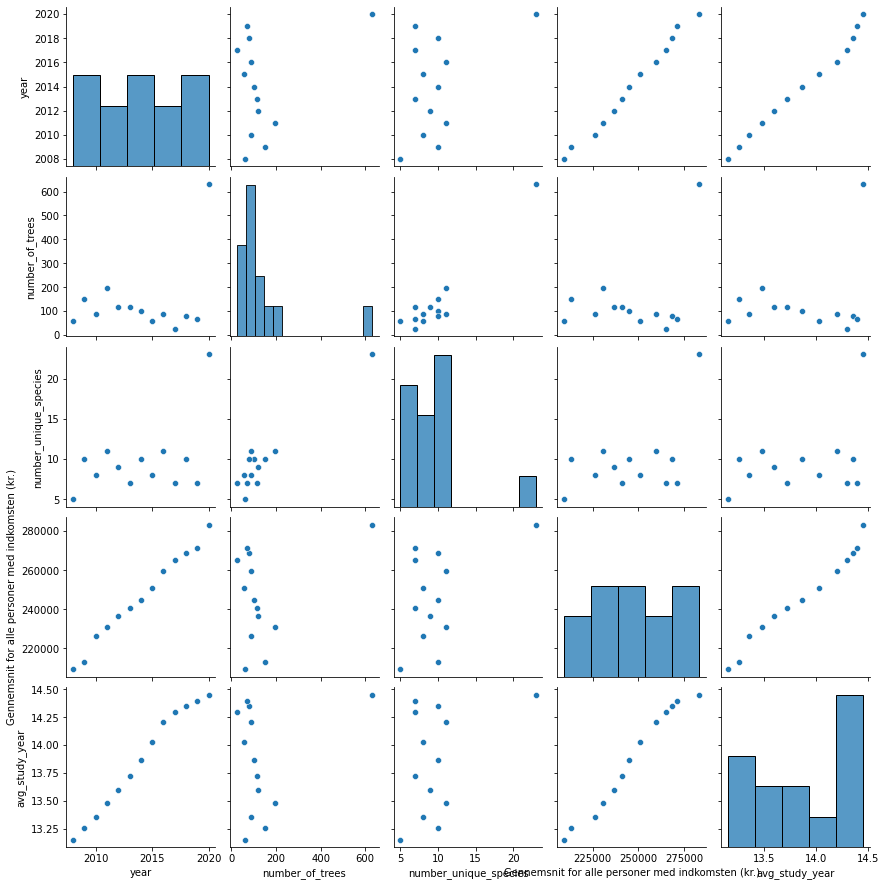

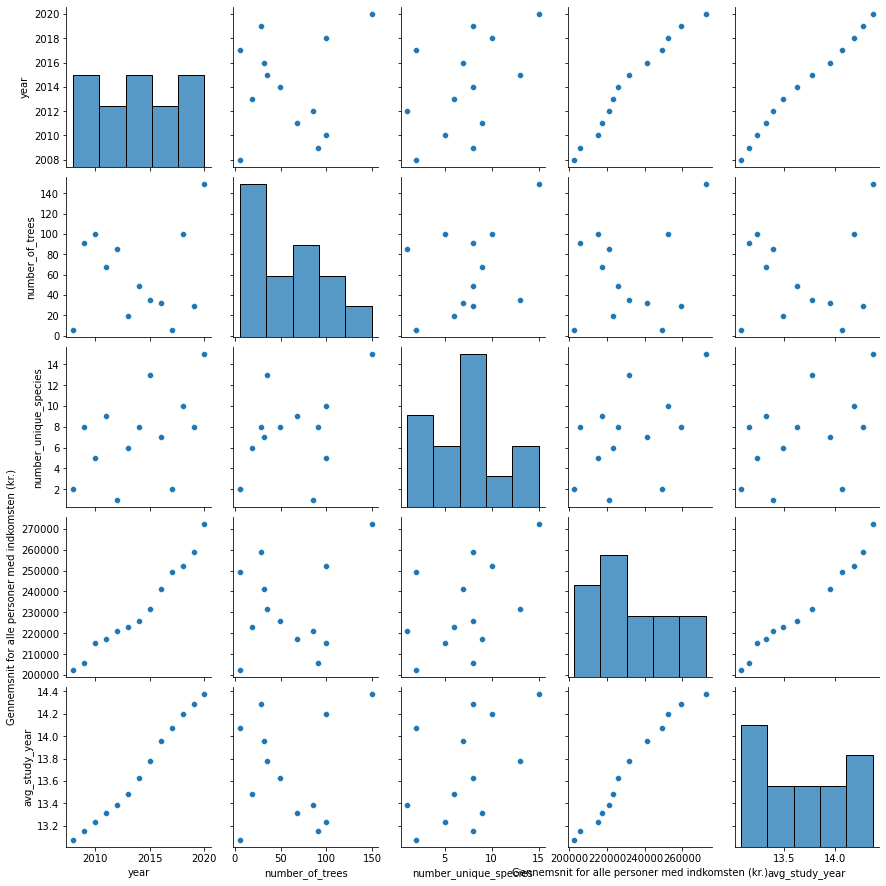

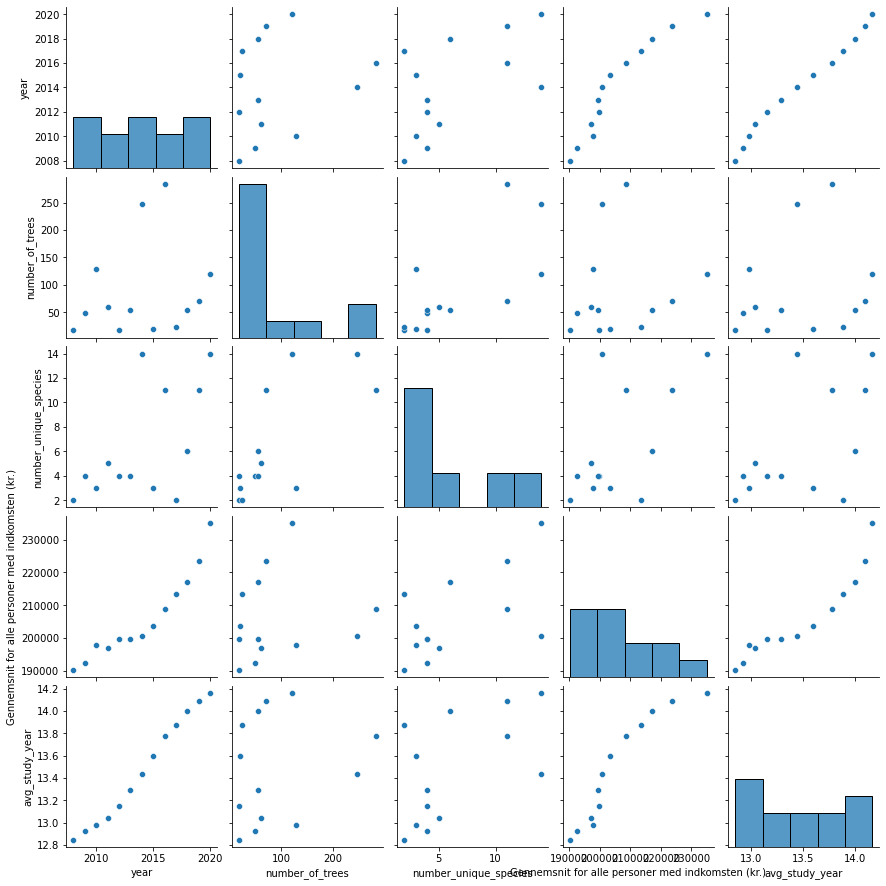

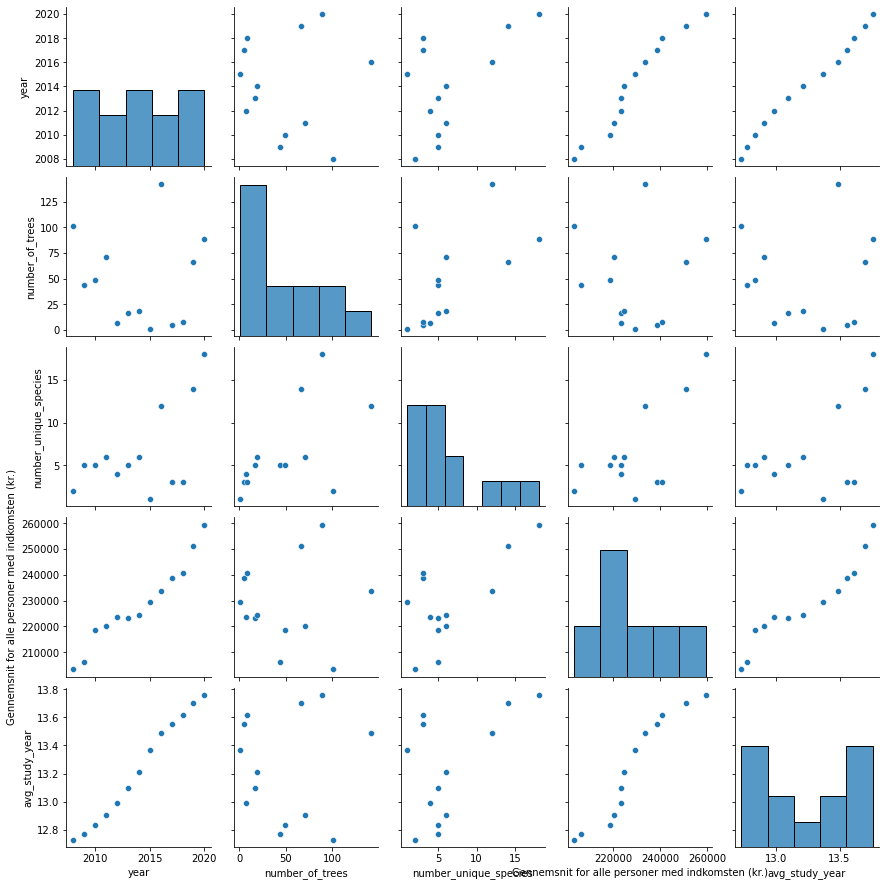

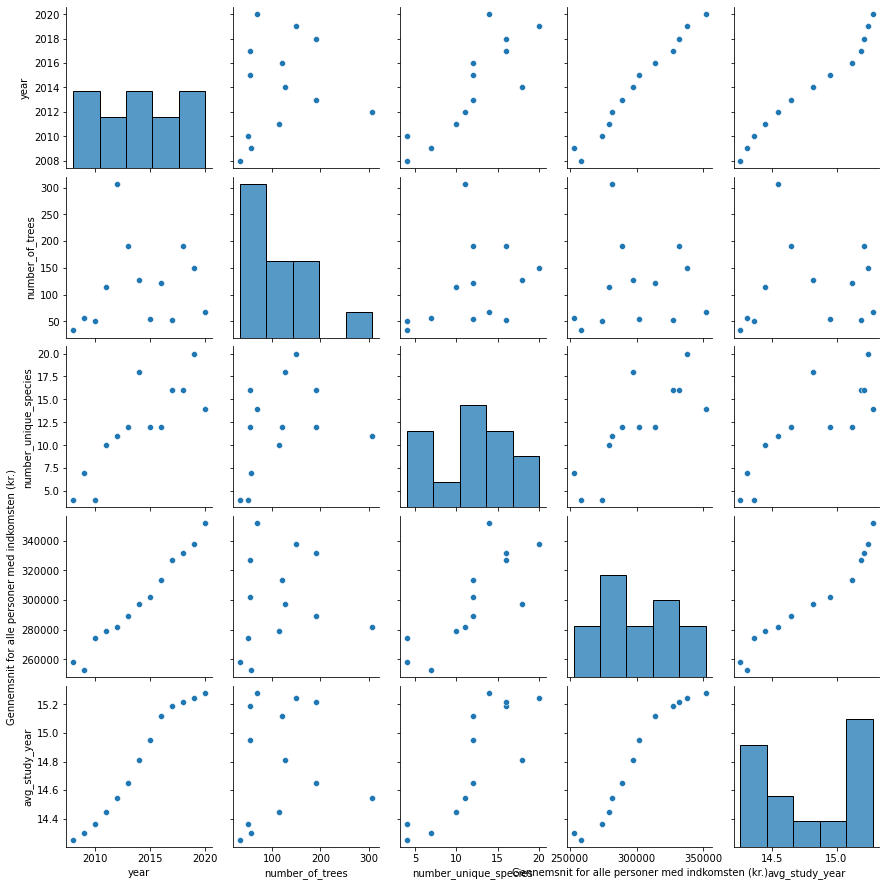

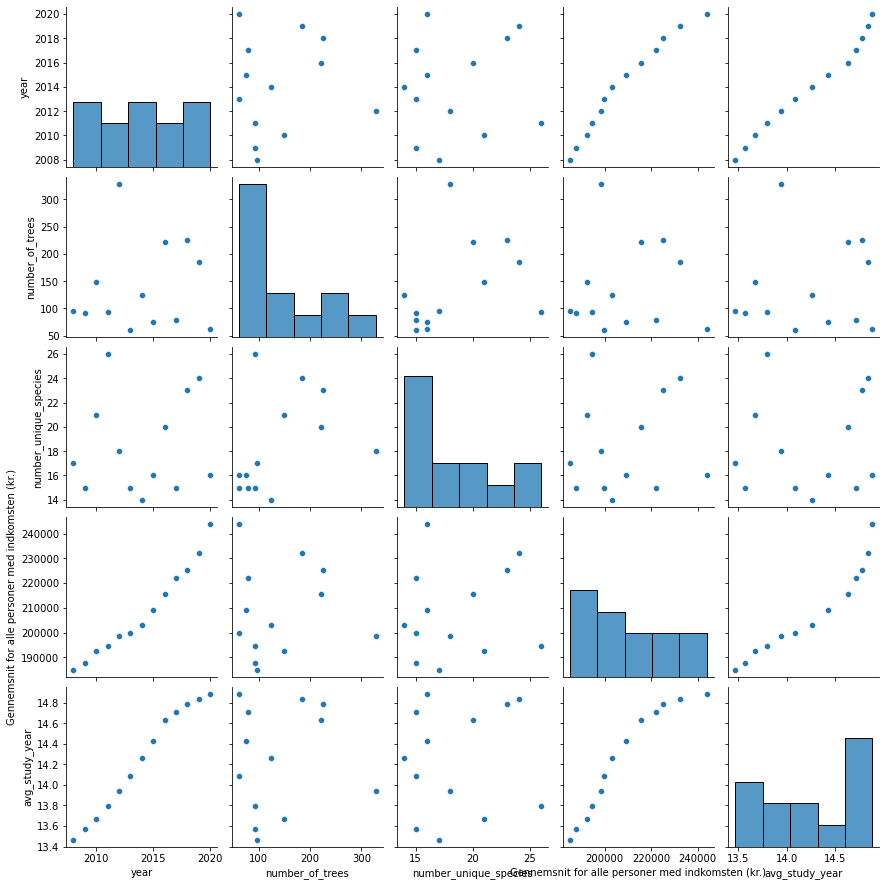

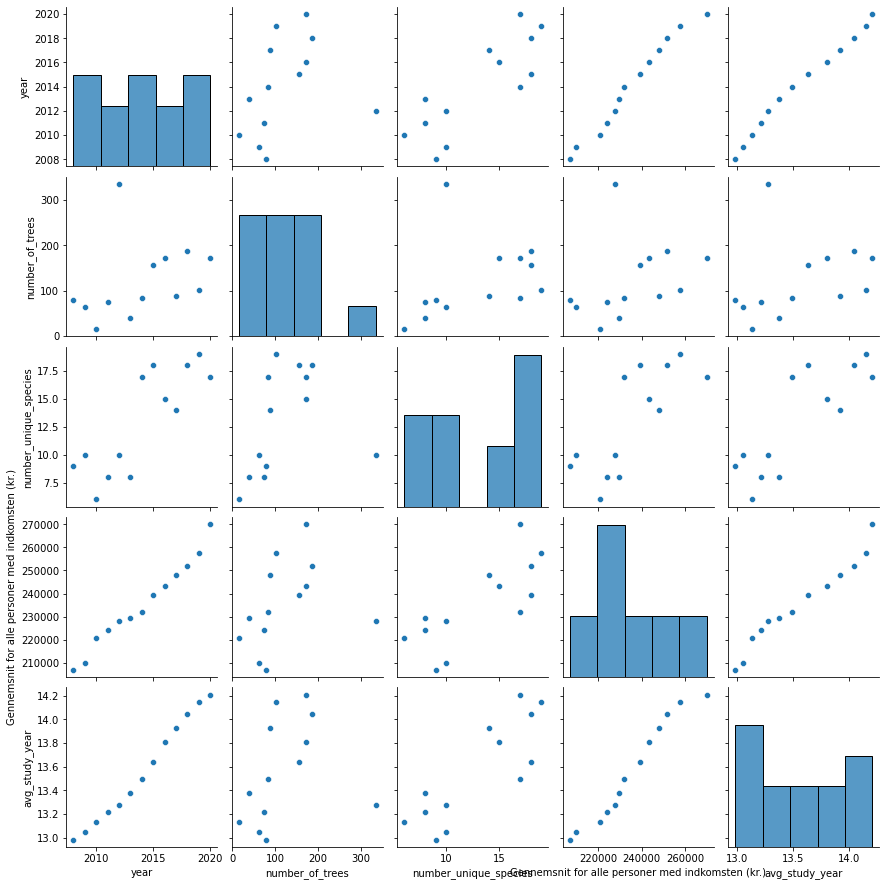

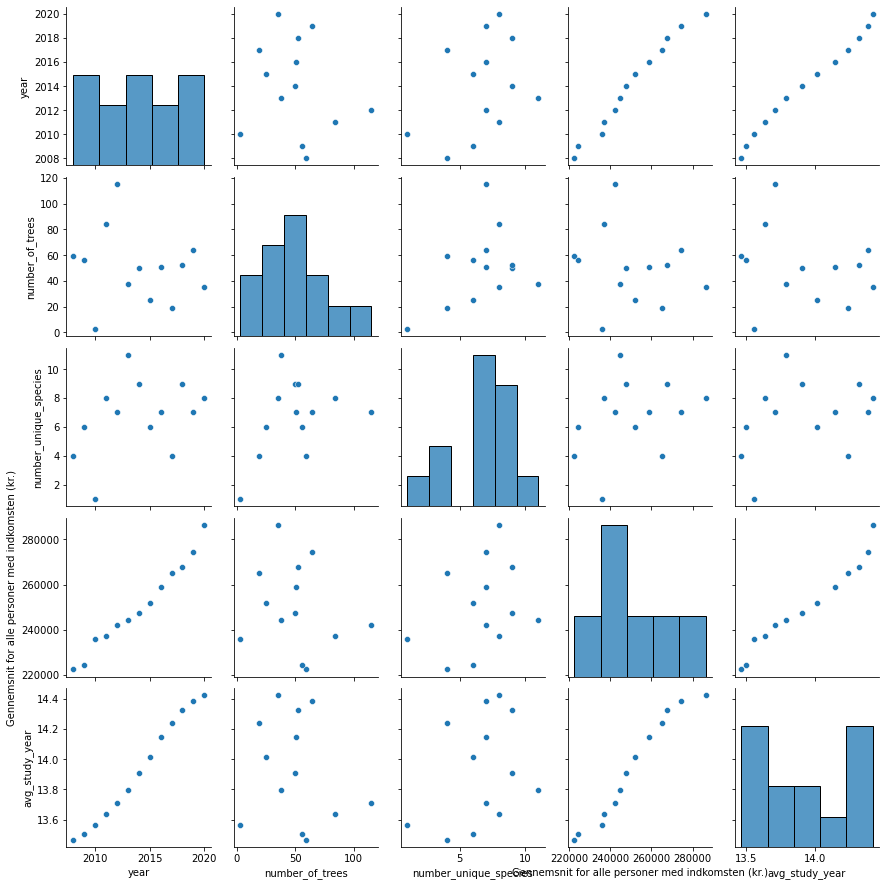

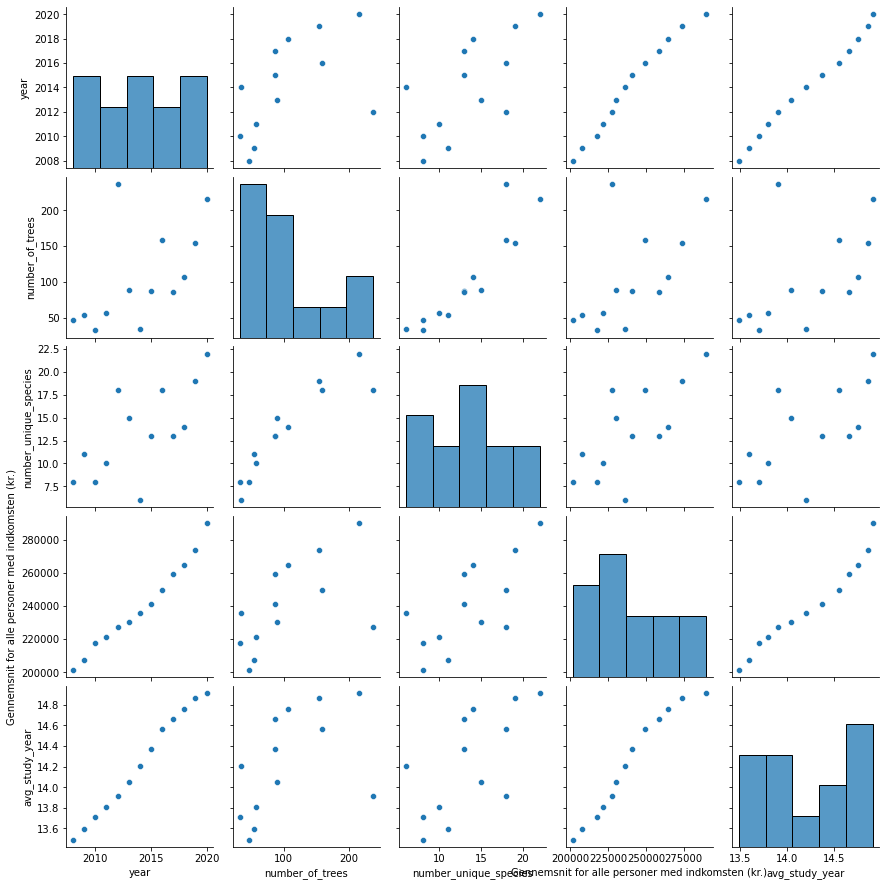

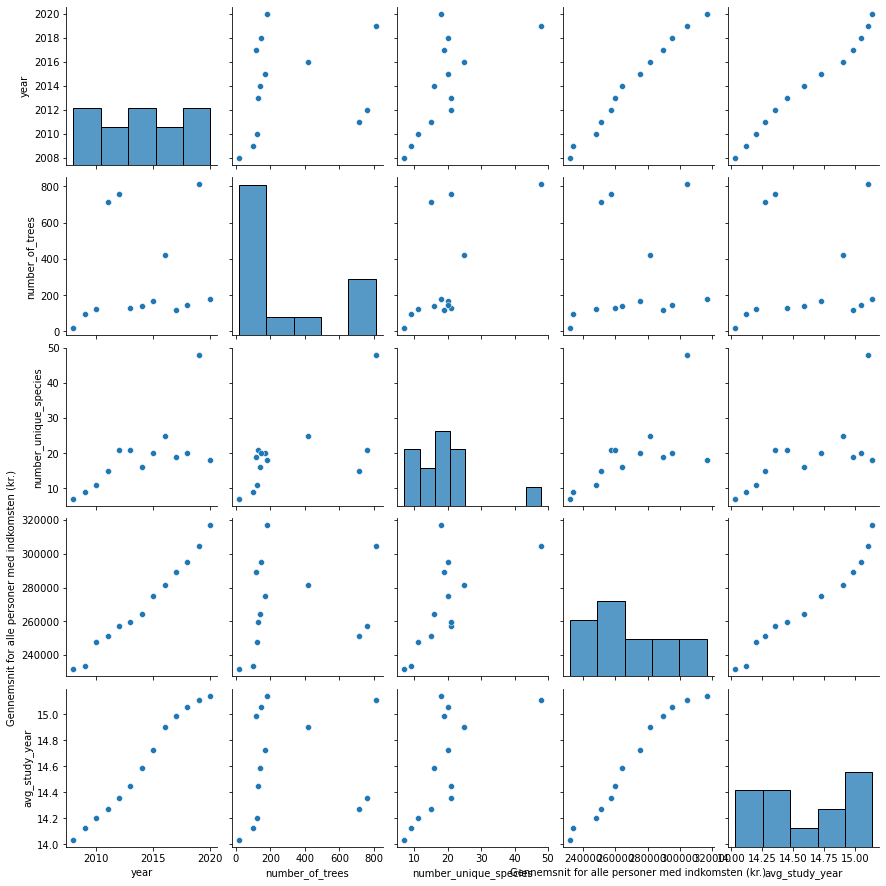

In [42]:
df_genial = pd.merge(pd.merge(df_tree_merged,df_income),df_education[['year','district','avg_study_year']])
districts = df_genial.district.unique()
for dist in districts:
    sns.pairplot(df_genial[df_genial.district == dist])
plt.show()